# Going Through Process of Building a Neural Network from Scratch

## Starting off with the elementary building blocks of the neural network: the neuron

Neurons are supposed to take in N number of inputs and each of those N inputs have a weight associated with them, for now we just use 3 random values to illustrate how it works.

Also has a bias term. 

In [2]:
inputs=[1.2, 3.4, 4.5]
weights=[3.2, 5.4,5.3]
bias=3

output=inputs[0]*weights[0]+inputs[1]*weights[1]+inputs[2]*weights[2]+bias
print(output)



49.05


Another example where maybe this neuron is from the output layer which has 4 input neurons, method of calculation remains unchanged

In [4]:
inputs=[1,2,3,2.5]
weights=[0.2,0.8,-0.5,1.0]
bias=2.0

output=inputs[0]*weights[0]+inputs[1]*weights[1]+inputs[2]*weights[2]+inputs[3]*weights[3]+bias
print(output)


4.8


Now imagine we are dealing with calculating the output of one whole layer of a neural network, the outputs of 3 neurons with 4 inputs, the inputs values will stay the same, but for each neuron, there is a different weight set and bias

In [6]:
inputs=[1,2,3,2.5]
weights1=[0.2,0.8,-0.5,1.0]
weights2=[0.51,-0.91,0.26,-0.5]
weights3=[-0.26,-0.27,0.17,0.87]
bias1=2.0
bias2=3
bias3=0.5


output= [inputs[0]*weights1[0]+inputs[1]*weights1[1]+inputs[2]*weights1[2]+inputs[3]*weights1[3]+bias1,
         inputs[0]*weights2[0]+inputs[1]*weights2[1]+inputs[2]*weights2[2]+inputs[3]*weights2[3]+bias2,
         inputs[0]*weights3[0]+inputs[1]*weights3[1]+inputs[2]*weights3[2]+inputs[3]*weights3[3]+bias3]
print(output)

[4.8, 1.22, 2.385]


More Dynamically Done in a single function

In [12]:
weights=[[0.2,0.8,-0.5,1.0],
         [0.51,-0.91,0.26,-0.5],
         [-0.26,-0.27,0.17,0.87]]
inputs=[1,2,3,2.5]
biases=[2,3,0.5]


def get_list_of_outputs(weights:list[list[int]],
                        biases: list[int],
                        inputs: list[int])->list[int]:
    final_outputs=[]
    for neuron_weights, neuron_bias in zip(weights, biases):
        neuron_output=0
        for neuron_input, neuron_weight in zip(inputs, neuron_weights):
            neuron_output+=neuron_input*neuron_weight
        neuron_output+=neuron_bias
        final_outputs.append(neuron_output)
    return final_outputs


print(get_list_of_outputs(weights, biases,inputs))


[4.8, 1.22, 2.385]


Now we make use of numpy dot prod

In [13]:
import numpy as np

weights=[[0.2,0.8,-0.5,1.0],
         [0.51,-0.91,0.26,-0.5],
         [-0.26,-0.27,0.17,0.87]]
inputs=[1,2,3,2.5]
biases=[2,3,0.5]

output=np.dot(weights, inputs)+biases
print(output)


[4.8   1.22  2.385]


Batch Processing inputs 

Weights need to be transposed for correct dimentions

In [17]:
import numpy as np

weights=[[0.2,0.8,-0.5,1.0],
         [0.51,-0.91,0.26,-0.5],
         [-0.26,-0.27,0.17,0.87]]
inputs=[[1,2,3,2.5],
        [2,5,-1,2],
        [-1.5, 2.7, 3.3, -0.8]]
biases=[2,3,0.5]

output=np.dot(inputs, np.array(weights).T)+biases  #rows of input dot prod with col of weights of previous layer, which is the same calculation as before. Biases array has a bias for each neuron in the curr layer
print(output)

[[ 4.8    1.22   2.385]
 [ 8.9   -1.79   0.2  ]
 [ 1.41   1.036  0.026]]


Now Another layer is added, with the same dimentions as the outputs for simplicity

In [20]:
import numpy as np

weights=[[0.2,0.8,-0.5,1.0],
         [0.51,-0.91,0.26,-0.5],
         [-0.26,-0.27,0.17,0.87]]
inputs=[[1,2,3,2.5],
        [2,5,-1,2],
        [-1.5, 2.7, 3.3, -0.8]]
biases=[2,3,0.5]

weights2=[[0.1,-0.14,0.5],
         [-0.5,0.12,-0.33],
         [-0.44,0.73,-0.13]]
biases2=[-1,2,-0.5]

layer1_output=np.dot(inputs, np.array(weights).T)+biases  #rows of input dot prod with col of weights of previous layer, which is the same calculation as before. 
                                                          #Biases array has a bias for each neuron in the curr layer
layer2_output=np.dot(layer1_output, np.array(weights2).T)+biases2
print(layer2_output)


[[ 0.5017  -1.04065 -2.03145]
 [ 0.2406  -2.7308  -5.7487 ]
 [-0.99104  1.41074 -0.3675 ]]


Creation of some kind of object for the layers:

Weights Initialisation: Try to keep it small (random values between 1 and -1 with a spread as small as possible) as you generally want values to be between -1 and 1 with. With large weights, at each layer the input will get bigger and bigger and it will in the end explode. What we could do is scale the input data as well.

Biases: Initialise them as zero, but sometimes could be a bad thing as if initially the neurons do not fire, then with the bias as zero, this zero value will propagate through the neural network and result in a dead network (can trace out the calculations before and figure out the logic if needed)



In [30]:
np.random.seed(0)


class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights=0.1* np.random.randn(n_inputs, n_neurons) #The 0.1 is to make the weights lie between our optimal range of -1 to 1
        self.biases=np.zeros((1,n_neurons))
    def forward(self,inputs):
        self.output = np.dot(inputs, self.weights)+self.biases

X=[[1,2,3,2.5],
    [2,5,-1,2],
    [-1.5, 2.7, 3.3, -0.8]]

layer1=Layer_Dense(4,5)
layer2=Layer_Dense(5,2) #number of inputs on layer 2 must be the same as layer 1 output/number of neurons

layer1.forward(X) #sample feed forward process with layer 2 taking in input from layer 1, and outputting a different shape
layer2.forward(layer1.output)
print(layer2.output)

[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


Activation Function: Makes use of ReLU, rectified linear unit, to cap values o

In [39]:
class Activation_RelU:
    def forward(self, inputs):
        self.output=np.maximum(0, inputs)

Firstly, we create the dataset, which is non-linear spiral data

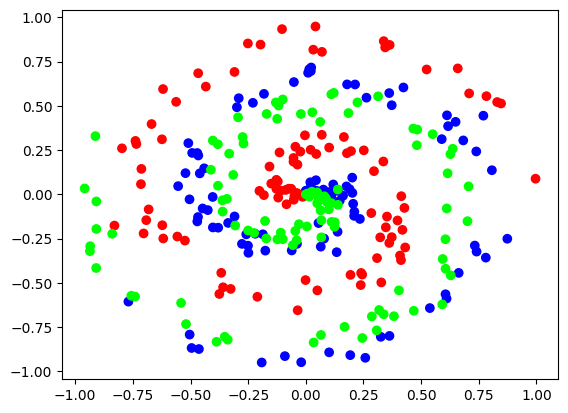

In [38]:

#https://cs231n.github.io/neural-networks-case-study/


def spiral_data(points, classes):
    X = np.zeros((points*classes, 2)) #creates a dataset of a 100 featuresets/points each containing 2 features, that can be classified into 3 diff classes
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

import matplotlib.pyplot as plt
X, y = spiral_data(100, 3)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()



Code All together with ReLU

In [43]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights=0.1* np.random.randn(n_inputs, n_neurons) #The 0.1 is to make the weights lie between our optimal range of -1 to 1
        self.biases=np.zeros((1,n_neurons))
    def forward(self,inputs):
        self.output = np.dot(inputs, self.weights)+self.biases
        
class Activation_RelU:
    def forward(self, inputs):
        self.output=np.maximum(0, inputs)

X=[[1,2,3,2.5],
    [2,5,-1,2],
    [-1.5, 2.7, 3.3, -0.8]]


X, y = spiral_data(100, 3)#since the data has 2 features, the neural network has to take inputs of 2 features


layer1=Layer_Dense(2,5)
activation1=Activation_RelU()

layer1.forward(X)
activation1.forward(layer1.output)

print(activation1.output)




[[0.         0.         0.         0.         0.        ]
 [0.00121762 0.00156342 0.         0.         0.00029026]
 [0.00079735 0.0022689  0.         0.         0.00223421]
 ...
 [0.         0.         0.13782968 0.         0.0291237 ]
 [0.         0.         0.10988553 0.         0.05070709]
 [0.         0.         0.14939041 0.         0.02209451]]


Softmax axtivation function:

One Thing about ReLU is that when you clip the negative values at 0, you cannot really know how negative a layers output is. For example -100 is definitely more wrong than -9, so when you are doing backprop, ReLU will inhibit the effectiveness of the learning process

To get rid of this limitation, we use softmax activation, which is firstly exponentiaing (e^x) all values and then applying a normalisation (x[i]/sum(x)) to optain the optimal output of all values fitting in a probability distribution

One limitation of using exponential function is that obviously with large x values, the y will explode, so for this we will take all values in the output values, and subtract the max of the output values from all the values. And what this does is it would make all values negative, but in the end it dosent change the output value after normalisation.


We now initialise a model that would try to predict the classes of this spiral data based on 300 datapoints, each having two featurs
Results: As you can see, the model is initialised randomly and untrained, so the predicted values should come out as kind of random 

In [45]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights=0.1* np.random.randn(n_inputs, n_neurons) #The 0.1 is to make the weights lie between our optimal range of -1 to 1
        self.biases=np.zeros((1,n_neurons))
    def forward(self,inputs):
        self.output = np.dot(inputs, self.weights)+self.biases
        
class Activation_RelU:
    def forward(self, inputs):
        self.output=np.maximum(0, inputs)

class Activation_Softmax:
    def forward(self, inputs):
        exp_values=np.exp(inputs-np.max(inputs, axis=1, keepdims=True)) #at this point keep in mind that since we are training in batches, the output is going to be multiple arrays of output neurons, so axis=1 
                                                                        #do this calculation for each batch and keep the general structure of the original 
        probabilities=exp_values/np.sum(exp_values, axis=1, keepdims=True)
        self.output=probabilities

X, y = spiral_data(100, 3)#since the data has 2 features, the neural network has to take inputs of 2 features


layer1=Layer_Dense(2,3)
activation1=Activation_RelU()

layer2=Layer_Dense(3,3)
activation2=Activation_Softmax()

layer1.forward(X)
activation1.forward(layer1.output)

layer2.forward(activation1.output)
activation2.forward(layer2.output)

print(activation2.output[:5])

[[0.33333333 0.33333333 0.33333333]
 [0.33335769 0.33331382 0.33332848]
 [0.3333991  0.33328066 0.33332024]
 [0.3334333  0.33325327 0.33331342]
 [0.3334737  0.33322093 0.33330538]]


Now with the neural network working, we can import the necessary datasets to use it

In [3]:

import setuptools.dist
from keras.datasets import mnist


(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_y)
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Flatten the images: (60000, 28, 28) -> (60000, 784)
train_X_flat = train_X.reshape(train_X.shape[0], -1)/255
test_X_flat = test_X.reshape(test_X.shape[0], -1)/255

m,n=train_X_flat.shape



[5 0 4 ... 5 6 8]


In [4]:
import numpy as np

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    # Ensure Y is an integer type
    Y = Y.astype(int)   
    # Create a one-hot encoded matrix
    one_hot_Y = np.zeros((Y.size, Y.max() + 1), dtype=int)  # Specify dtype=int to avoid TypeError
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y #error at output (Derivative of loss function wrt Z2 or nett output layer 2)
    dW2 = 1 / m * dZ2.dot(A1.T) #Derivative of loss function with respect to weights averaged over m values, transpose is just to fit the right matrix proportions
    db2 = 1 / m * np.sum(dZ2) #Derivative of loss function wrt to biases, dz2/db2=1 , let db2 be the derivative of L with respect to Z2, using chain rule Dl/Db2 (derivative of loss wrt to biases)= dz2*1 = dz2, db2= 1/m sum over m terms of dz2
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1) #this one is just backwards calculation
    dW1 = 1 / m * dZ1.dot(X.T) #similar calculations to above intuition is that weight W1ik connects the ith neuron in the first layer to the kth neuron in the output layer, therefore DZ1/DW1 is A transpose, and that using chain rule DL/Dw1 is the same as above, 
    db1 = 1 / m * np.sum(dZ1)#similar to above
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [5]:
W1, b1, W2, b2 = gradient_descent(train_X_flat.T, train_y, 0.05, 10000)

Iteration:  0
[4 4 4 ... 4 4 4] [5 0 4 ... 5 6 8]
0.09715
Iteration:  10
[9 0 5 ... 6 9 1] [5 0 4 ... 5 6 8]
0.11826666666666667
Iteration:  20
[9 0 4 ... 6 6 1] [5 0 4 ... 5 6 8]
0.16316666666666665
Iteration:  30
[9 0 4 ... 6 6 1] [5 0 4 ... 5 6 8]
0.2024
Iteration:  40
[9 0 4 ... 6 6 1] [5 0 4 ... 5 6 8]
0.24118333333333333
Iteration:  50
[7 0 4 ... 6 6 1] [5 0 4 ... 5 6 8]
0.28096666666666664
Iteration:  60
[7 0 4 ... 6 6 1] [5 0 4 ... 5 6 8]
0.3189666666666667
Iteration:  70
[7 0 7 ... 6 6 1] [5 0 4 ... 5 6 8]
0.35413333333333336
Iteration:  80
[7 0 7 ... 6 6 1] [5 0 4 ... 5 6 8]
0.38626666666666665
Iteration:  90
[7 0 7 ... 6 6 1] [5 0 4 ... 5 6 8]
0.41606666666666664
Iteration:  100
[7 0 7 ... 6 6 1] [5 0 4 ... 5 6 8]
0.44205
Iteration:  110
[7 0 7 ... 6 6 1] [5 0 4 ... 5 6 8]
0.46648333333333336
Iteration:  120
[7 0 7 ... 6 6 1] [5 0 4 ... 5 6 8]
0.49128333333333335
Iteration:  130
[7 0 7 ... 6 6 1] [5 0 4 ... 5 6 8]
0.51355
Iteration:  140
[7 0 7 ... 4 6 1] [5 0 4 ... 5 6 8]
0

Testing on test dataset: test_X_flat of dims (784, 10000)

Accuracy of predicting 10000 digits is quite successful, at 91%

In [9]:
print(test_X_flat.T.shape)
Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, test_X_flat.T)
test_predictions=get_predictions(A2)
print(get_accuracy(test_predictions, test_y))


(784, 10000)
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]
0.9184
